# HOM notebook

The objective of the notebook is to implemet the Hong-Ou-Mandel effect: a 2-photon interference that test for the indistinguishability of photons. When two indistinguishable photons enter a beam-splitter, they __bunch__ that is they exit the beam-splitter in the same output spatial mode.

<img src="HOM2.gif" width="750" align="center">

We want to model this with __Perceval__.

In the first place, we need to import all the libraries we will use in this notebook:

In [ ]:
import numpy as np                # the standard numpy library
import sympy as sp                # for symbolic computation
import matplotlib.pyplot as plt   # to plot nice graphs

import perceval as pcvl           # this is actually where we import the mighty Perceval
import perceval.lib.phys as phys  # here we load all physical components like beam-splitters and phase-shifters

## Introduction

We are going to use a backend to simulate the behaviour of our optical device.
In Perceval, four backends are implemented (cf [documentation](https://perceval.quandela.net/docs/backends.html)). We are going to use one of those : The `Naive` backend.

This back-end implements direct permanent calculation and is therefore suited for single output probability computation with small memory cost. We use `CircuitAnalyser` to analyse the circuit and compute the associated output probabilities.

In the next cell, we call the `Naive` backend that we store in `simulator_backend`:

In [ ]:
simulator_backend = pcvl.BackendFactory().get_backend('Naive')

We will now create an input state that will enter our optical scheme later on. We store it in `input_state` and use `BasicState` from the Perceval library. For the Hong-Ou-Mandel effect, we just need circuit with 2 modes (i.e. 2 wires). We put one photon on the first wire and the one other photon on the second wire of the circuit.

In [ ]:
input_state = pcvl.BasicState("|1,1>")

### Beam-splitters

The main component of our circuit will be beamsplitters that we can call using `phys.BS()`. This is parametrisable by specifying the value of the unknown angle $\theta$: `phys.BS(theta=value)`. 

We use `pdisplay` to print the Perceval objects. Printing a Perceval circuit object will result in a graphical representation of the circuit.

In [ ]:
pcvl.pdisplay(phys.BS()) # Display of a BS

We can also output the unitary matrix associated to the circuit with the method `.U`:

In [ ]:
phys.BS().U # Display of the unitary matrix associated to a BS

As specified above, a beam-splitter can take as argument an angle $\theta$ to modify the reflectivity:

In [ ]:
phys.BS(theta=sp.pi).U # a purely transmissive beam-splitter

### Phase-shifters

The second main component of our circuit is the phase shifter alias PS. We have to specify the phase $\phi$ of the PS as an argument.

In [ ]:
pcvl.pdisplay(phys.PS(phi=sp.pi/8))

In [ ]:
phys.PS(phi=sp.pi/8).U

### A first simulation of the HOM effect

Now, let's simulate the distribution obtained when we input two photons in a beam-splitter. We will use the `Naive` backend already stored in `simulator_backend`.

We will simulate the behaviour of the circuit using the class `Circuit Analyser` which has three arguments:

- The first one is an instance of the simulator applied to the transfer matrix of the circuit.
- The second one is the input state (we will use `input_state`).
- The third one is the desired output states. To compute all possible output states, one just input `"*"`.

Then, we display the result of `Circuit Analyser` via `pdisplay`.

In [ ]:
sim = simulator_backend(phys.BS().U)        # create an instance of the simulator applied to the transfer matrix of the circuit

ca = pcvl.CircuitAnalyser(sim,
                          [input_state],
                          "*")              # create an instance of circuit analyser

ca.compute()                                # run the computation

pcvl.pdisplay(ca)

From this probability, what can we deduce? *something about indistinguishability*

Instead of analysing all possible outputs with `"*"`, we can __post-select__ on specific output states. This is called the post-selection. Try to do it for the output states |2,0> and |0,2>. You only have to replace '*' by `[pcvl.BasicState("|2,0>"), pcvl.BasicState("|0,2>")]`.

In [ ]:
sim = simulator_backend(phys.BS().U)        # create an instance of the simulator applied to the transfer matrix of the circuit

ca = pcvl.CircuitAnalyser(sim,
                          [input_state],
                          [pcvl.BasicState("|2,0>"), pcvl.BasicState("|0,2>")])

pcvl.pdisplay(ca)

In Perceval, the class `CircuitAnalyser` has methods. For instance, all the states analysed in the output via the method `.output_states_list`:

In [ ]:
print([str(state) for state in ca.output_states_list])

You can also print the probability of these states with:

In [ ]:
print(ca.distribution)

### MZI circuit

In this part, we want to display the Mach-Zendher Interferometer circuit composed of two blocks with a phase-shifter and a beam-splitter each:

<img src="images/MZI.png" width="750" align="center">

Before doing the MZI circuit all by yourself, we will show you an example on a smaller circuit composed of one block: a beam-splitter followed by a phase-shifter on the upper wire:

In [ ]:
circuit = pcvl.Circuit(2,name='example') # create the circuit with 2 modes (or 2 wires)

phase = pcvl.Parameter("phi")            # create a modifiable unknown parameter for the phase-shifter
circuit.add((0,1), phys.BS())            # add a beam-splitter to the circuit between modes 0 and 1
circuit.add(0, phys.PS(phase))           # add a phase-shifter with angle phi to mode 0

pcvl.pdisplay(circuit)                   # display the circuit
circuit.U                                # output the corresponding unitary matrix

We can also specify the value of phi parameter using the method `set_value`.

In [ ]:
phase.set_value(sp.pi/2)

We can now print the unitary matrix associated to this circuit with the angle specified:

In [ ]:
circuit.U

Its' your turn to play ! Create the MZI interferometer as `pcvl.Circuit` object called `mzi_chip` and display it. It should look like the picture above. This is a circuit composed of 2 modes with a tunable phase-shifter on mode 0, followed by a 50:50 beam-splitter, followed by a tunable phase-shifter on mode 0 and finally followed by another beam-splitter.

In [ ]:
mzi_chip = pcvl.Circuit(2,name='mzi')
phase = pcvl.Parameter("phi1")
"""Fill in the gap"""

pcvl.pdisplay(mzi_chip)

Then, print the associated unitary matrix using `pdisplay` (remember that we can get the unitary matrix associated with a `pcvl.Circuit` object with the method `.U`):

Now, we are going to do the exact same simulation that we did for the single beam-splitter but this time for our complete MZI circuit.

Let's first attribute values to the phases using `set_value`. The phase $\phi$ will be $\frac{\pi}{2}$.

The input state is still one photon on the first branch and one photon on the second branch. We will analyse all output states so the third argument of `pcvl.CircuitAnalyser` is still `"*"`. We will store the ouput of circuit analyser in `ca`. 

### Graph of the probability in function of the phase 

In this last part, we want to obtain the following graph: 


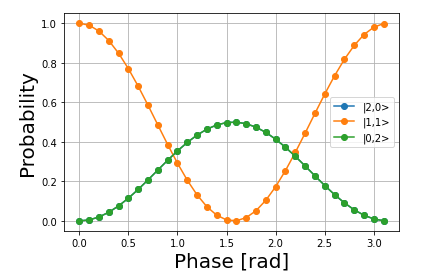

This shows the Hong-Ou-Mandel effect as we see that the probability of obtaining the state $\vert 1,1 \rangle$ increases with the photons become distinguishable (i.e. when they have a maximal relative phase). 

### Collecting data

The phases of the phase-shifter should vary between 0 and $\pi$ with a step of 0.1.

In [ ]:
scan_range = np.arange(0,np.pi,0.1)

We store the number of possible outputs that `CircuitAnalyser` will analyse: 

In [ ]:
nb_of_outputs = len(ca.output_states_list)

For the graph, we need to create a list to store the probability of each output together with the associated phase. 

In [ ]:
output = [[] for i in range(nb_of_outputs)]

Then, you can do a for loop that runs the simulation for values of $\phi$ in their interval defined above with `scan_range`:

- First, set the phase of the MZI with `set_value`
- Then, run the `CircuitAnalyser` for your MZI to a given phi  
- Add ca.compute() which will calculate the probability of a single output
- And finally, append the result to `output` to plot your graph by doing a for loop on `len(output)`. You can then use : `output[i].append(ca.distribution[0][i])`

### Plot

Here is the plot of probability as a function of the phase for each output.
The x-axis should be the variation of the phi phases between 0 and $\pi$ with a 0.1 step.
The y-axis should be each value of this output list.

In [ ]:
plt.figure()
for i, out in enumerate(output):
    plt.plot(scan_range, out, '-o', label=ca.output_states_list[i])
plt.xlabel('Phase [rad]', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.grid()
plt.legend()